In [16]:

import utils.common
import evaluation
import importlib
import numpy as np
import time
import models.MatrixFactorization
importlib.reload(utils.common)
importlib.reload(evaluation)
importlib.reload(models.MatrixFactorization)



<module 'models.MatrixFactorization' from '/mnt/e/owncloud/FH/MasterThesis/Code/models/MatrixFactorization.py'>

In [ ]:
model = ConstraintAutoRec(utils.common.movie_lens['dimensions'], epochs=30, novelty_weight=0.25, diversity_weight=0)
model.train(utils.common.load_dataset(utils.common.movie_lens, 'train'), utils.common.movie_lens['train']['records'])


In [ ]:
diversity_model = ConstraintAutoRec(utils.common.movie_lens['dimensions'], epochs=30, novelty_weight=0.25, diversity_weight=2.0)
diversity_model.train(utils.common.load_dataset(utils.common.movie_lens, 'train'), utils.common.movie_lens['train']['records'])


In [73]:
def create_model(novelty_weight):
    m = ConstraintAutoRec(utils.common.movie_lens['dimensions'], epochs=5, novelty_weight=novelty_weight, diversity_weight=0)
    m.train(utils.common.load_dataset(utils.common.movie_lens, 'train'), utils.common.movie_lens['train']['records'])
    return m

models = [create_model(x) for x in [0.1, 0.5, 1.0, 2.0]]

Epoch 1/5
3462/3462 [==============================] - 61s 18ms/step - loss: 0.0296 - accuracy: 0.1109
Epoch 2/5
3462/3462 [==============================] - 44s 13ms/step - loss: 0.0176 - accuracy: 0.1039
Epoch 3/5
3462/3462 [==============================] - 45s 13ms/step - loss: 0.0150 - accuracy: 0.1161
Epoch 4/5
3462/3462 [==============================] - 45s 13ms/step - loss: 0.0138 - accuracy: 0.1660
Epoch 5/5
3462/3462 [==============================] - 44s 13ms/step - loss: 0.0130 - accuracy: 0.1881
Epoch 1/5
3462/3462 [==============================] - 57s 16ms/step - loss: 0.0684 - accuracy: 0.0457
Epoch 2/5
3462/3462 [==============================] - 44s 13ms/step - loss: 0.0438 - accuracy: 0.0659
Epoch 3/5
3462/3462 [==============================] - 44s 13ms/step - loss: 0.0387 - accuracy: 0.0913
Epoch 4/5
3462/3462 [==============================] - 44s 13ms/step - loss: 0.0360 - accuracy: 0.1163
Epoch 5/5
3462/3462 [==============================] - 44s 13ms/step - lo

In [50]:
import matplotlib.pyplot as plt
models

In [85]:
#ev = evaluation.Evaluation(utils.common.movie_lens)
#big_eval = ev.evaluate_models(models)
big_eval.head()

,accuracy,diversity@10,diversity@5,diversity_weight,epc@10,epc@5,epd@5,epochs,mse,name,novelty_weight,precision,recall
0,0.993700,0.309300,0.305382,0,0.809829,0.797125,0.339143,5,0.146269,ConstraintAutoRec,0.1,1.0,0.993700
1,0.981441,0.301321,0.294672,0,0.828672,0.820444,0.335802,5,0.194387,ConstraintAutoRec,0.5,1.0,0.981441
2,0.971551,0.293877,0.287011,0,0.832976,0.827268,0.332188,5,0.220843,ConstraintAutoRec,1.0,1.0,0.971551
3,0.956056,0.288221,0.279943,0,0.850899,0.847013,0.330940,5,0.253143,ConstraintAutoRec,2.0,1.0,0.956056


In [75]:
big_eval

,accuracy,diversity@10,diversity@5,diversity_weight,epc@10,epc@5,epd@5,epochs,mse,name,novelty_weight,precision,recall
0,0.993433,0.309370,0.000677,0,0.809861,0.797123,0.000770,5,0.146175,ConstraintAutoRec,0.1,1.0,0.993433
1,0.980580,0.301300,0.000701,0,0.828527,0.820255,0.000764,5,0.194251,ConstraintAutoRec,0.5,1.0,0.980580
2,0.970214,0.293833,0.000676,0,0.832992,0.827355,0.000760,5,0.220695,ConstraintAutoRec,1.0,1.0,0.970214
3,0.953900,0.288207,0.000624,0,0.850782,0.846885,0.000748,5,0.253001,ConstraintAutoRec,2.0,1.0,0.953900


<BarContainer object of 4 artists>

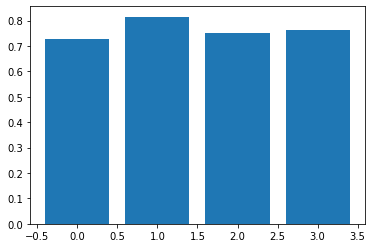

In [55]:
plt.bar(eval_data.index, eval_data['epc@10'])

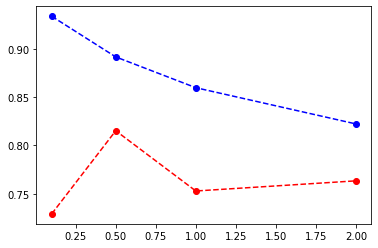

In [71]:
plt.plot(eval_data['novelty_weight'], eval_data['epc@10'], 'ro', ls='--')
plt.plot(eval_data['novelty_weight'], eval_data['accuracy'], 'bo', ls='--')
plt.show()

In [58]:
def plot_bar(data, axis, x_param):
    bottom = data[axis].min() 
    top = data[axis].max()
    margin = (top - bottom) * 0.05
    fig, ax = plt.subplots()
    ax.bar(data.index, data[axis] )
    ax.set_xticks(data.index)
    ax.set_xticklabels(data[x_param])
    ax.set_ylabel(axis)
    ax.set_xlabel(x_param)
    plt.show()

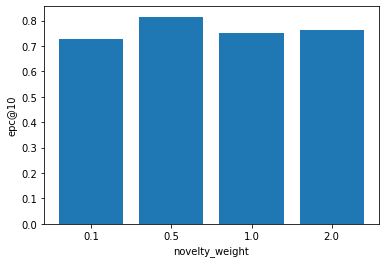

In [59]:
plot_bar(eval_data, 'epc@10', 'novelty_weight')

In [19]:
plot_bar(eval_data, 'accuracy', 'novelty_weight')

NameError: name 'plot_bar' is not defined

In [104]:

import utils.common
import evaluation
import importlib
import numpy as np
import time
import models.MatrixFactorization
importlib.reload(utils.common)
importlib.reload(evaluation)
importlib.reload(models.MatrixFactorization)



<module 'models.MatrixFactorization' from '/mnt/e/owncloud/FH/MasterThesis/Code/models/MatrixFactorization.py'>

In [108]:
mf = models.MatrixFactorization.MatrixFactorization(utils.common.movie_lens['user'], utils.common.movie_lens['dimensions'], epochs=30)
mf.train(utils.common.load_dataset(utils.common.movie_lens, 'train'), utils.common.movie_lens['train']['records'])

Epoch 000 Loss at step 000: 1.962
Epoch 001 Loss at step 000: 1.231
Epoch 002 Loss at step 000: 0.945
Epoch 003 Loss at step 000: 0.739
Epoch 004 Loss at step 000: 0.583
Epoch 005 Loss at step 000: 0.465
Epoch 006 Loss at step 000: 0.373
Epoch 007 Loss at step 000: 0.302
Epoch 008 Loss at step 000: 0.246
Epoch 009 Loss at step 000: 0.202
Epoch 010 Loss at step 000: 0.167
Epoch 011 Loss at step 000: 0.140
Epoch 012 Loss at step 000: 0.117
Epoch 013 Loss at step 000: 0.099
Epoch 014 Loss at step 000: 0.084
Epoch 015 Loss at step 000: 0.072
Epoch 016 Loss at step 000: 0.062
Epoch 017 Loss at step 000: 0.054
Epoch 018 Loss at step 000: 0.047
Epoch 019 Loss at step 000: 0.041
Epoch 020 Loss at step 000: 0.036
Epoch 021 Loss at step 000: 0.032
Epoch 022 Loss at step 000: 0.028
Epoch 023 Loss at step 000: 0.025
Epoch 024 Loss at step 000: 0.023
Epoch 025 Loss at step 000: 0.020
Epoch 026 Loss at step 000: 0.018
Epoch 027 Loss at step 000: 0.017
Epoch 028 Loss at step 000: 0.015
Epoch 029 Loss

In [109]:
ev = evaluation.Evaluation(utils.common.movie_lens)
ev.evaluate(mf)

Process batch 0
Process batch 1
Process batch 2
Process batch 3
Process batch 4


{'accuracy': 0.4552522101225941,
 'precision': 1.0,
 'recall': 0.4552522101225941,
 'mse': 34.22495481105142,
 'diversity@5': 0.37978105322153205,
 'diversity@10': 0.38001766147539223,
 'epc@5': 0.994477823488149,
 'epc@10': 0.9943148507151829,
 'epd@5': 0.38238987338903574,
 'name': None,
 'latent_dim': 128,
 'epochs': 30,
 'batch_size': 64}